In [76]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn import linear_model

df = pd.read_csv("/kaggle/input/hiring-candidates-multivariate-regression/hiring.csv")
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [77]:
avg_testscore = int(df.get("test_score(out of 10)").mean())
print(avg_testscore)
df["test_score(out of 10)"] = df.get("test_score(out of 10)").fillna(avg_testscore)
df

7


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [78]:
from word2number import w2n

newyears=[]
df.experience = df.experience.fillna(0)
for years in df.experience:
    print(years)
    if years!=0:
        newyears.append(w2n.word_to_num(years))
    else:
        newyears.append(0)
df.experience = newyears
df



0
0
five
two
seven
three
ten
eleven


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [79]:
model = linear_model.LinearRegression()
model.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],df["salary($)"])

y=[]
y.append(model.predict([[2,9,6]])[0])
y.append(model.predict([[12,10,10]])[0])
print(y)

[53713.86677124004, 93747.79628650835]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    7.0                           7      72000
7          11                    7.0                           8      80000


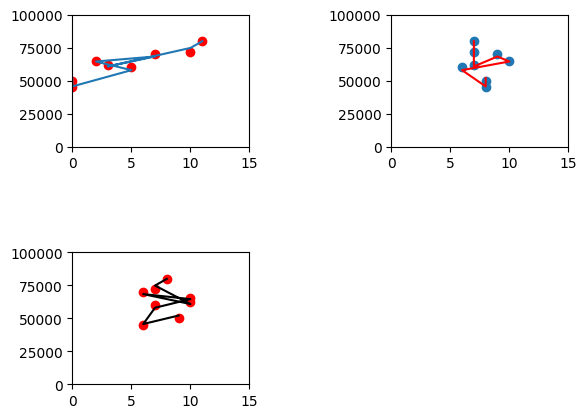

In [94]:
%matplotlib inline
print(df)
pl.subplots_adjust(wspace=0.8, hspace=0.8)
pl.subplot(2,2,1)
pl.scatter(df["experience"],df["salary($)"],color="red")
pl.plot(df["experience"],model.predict(df[["experience","test_score(out of 10)","interview_score(out of 10)"]]))
pl.axis([0,15,0,100000])

pl.subplot(2,2,2)
pl.scatter(df["test_score(out of 10)"],df["salary($)"])
pl.plot(df["test_score(out of 10)"],model.predict(df[["experience","test_score(out of 10)","interview_score(out of 10)"]]),color="red")
pl.axis([0,15,0,100000])

pl.subplot(2,2,3)
pl.axis([0,15,0,100000])
pl.scatter(df["interview_score(out of 10)"],df["salary($)"],color="red")
pl.plot(df["interview_score(out of 10)"],model.predict(df[["experience","test_score(out of 10)","interview_score(out of 10)"]]),color="black")